In [97]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Combining all files into one master file

In [98]:
data_file_folder ='../data/'
df = []
for file in os.listdir(data_file_folder):
        if file.endswith('.xlsx'):             
             df.append(pd.read_excel(os.path.join(data_file_folder,file),sheet_name='Sheet1'))
df_master = pd.concat(df, axis = 0)

In [99]:
df_master.isna().sum()

Year                                             0
State                                            0
County                                           0
fatalities                                       0
injuries                                         0
total_crashes                                    0
population                                       2
CBSA Title                                    1994
Metropolitan/Micropolitan Statistical Area    1994
dtype: int64

In [100]:
df_master.head(20)

,Year,State,County,fatalities,injuries,total_crashes,population,CBSA Title,Metropolitan/Micropolitan Statistical Area
0,2013,Florida,ALACHUA,33,3321,4651,252475.0,"Gainesville, FL",Metropolitan Statistical Area
1,2013,Florida,BAKER,9,270,293,27009.0,"Jacksonville, FL",Metropolitan Statistical Area
2,2013,Florida,BAY,17,2208,3514,174596.0,"Panama City, FL",Metropolitan Statistical Area
3,2013,Florida,BRADFORD,5,202,220,26802.0,NaN,NaN
4,2013,Florida,BREVARD,76,5041,7079,550255.0,"Palm Bay-Melbourne-Titusville, FL",Metropolitan Statistical Area
5,2013,Florida,BROWARD,180,21580,32595,1836600.0,"Miami-Fort Lauderdale-Pompano Beach, FL",Metropolitan Statistical Area
6,2013,Florida,CALHOUN,1,109,152,14578.0,NaN,NaN
7,2013,Florida,CHARLOTTE,22,1412,2091,164671.0,"Punta Gorda, FL",Metropolitan Statistical Area
8,2013,Florida,CITRUS,17,993,1360,138829.0,"Homosassa Springs, FL",Metropolitan Statistical Area
9,2013,Florida,CLAY,10,1621,2434,195657.0,"Jacksonville, FL",Metropolitan Statistical Area


In [101]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 0 to 2031
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5402 non-null   int64  
 1   State                                       5402 non-null   object 
 2   County                                      5402 non-null   object 
 3   fatalities                                  5402 non-null   int64  
 4   injuries                                    5402 non-null   int64  
 5   total_crashes                               5402 non-null   int64  
 6   population                                  5400 non-null   float64
 7   CBSA Title                                  3408 non-null   object 
 8   Metropolitan/Micropolitan Statistical Area  3408 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 422.0+ KB


In [102]:
df_master['Fatalities per 100,000 population'] = round((df_master['fatalities'] / df_master['population']) * 100000)
df_master['Injuries per 100,000 population'] = round((df_master['injuries'] / df_master['population']) * 100000)
df_master['Total Crashes per 100,000 population'] = round((df_master['total_crashes'] /df_master['population']) * 100000)
df_master

,Year,State,County,fatalities,injuries,total_crashes,population,CBSA Title,Metropolitan/Micropolitan Statistical Area,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,2013,Florida,ALACHUA,33,3321,4651,252475.0,"Gainesville, FL",Metropolitan Statistical Area,13.0,1315.0,1842.0
1,2013,Florida,BAKER,9,270,293,27009.0,"Jacksonville, FL",Metropolitan Statistical Area,33.0,1000.0,1085.0
2,2013,Florida,BAY,17,2208,3514,174596.0,"Panama City, FL",Metropolitan Statistical Area,10.0,1265.0,2013.0
3,2013,Florida,BRADFORD,5,202,220,26802.0,NaN,NaN,19.0,754.0,821.0
4,2013,Florida,BREVARD,76,5041,7079,550255.0,"Palm Bay-Melbourne-Titusville, FL",Metropolitan Statistical Area,14.0,916.0,1286.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2027,2020,Texas,WOOD,12,120,526,45010.0,NaN,NaN,27.0,267.0,1169.0
2028,2020,Texas,YOAKUM,0,15,67,7669.0,NaN,NaN,0.0,196.0,874.0
2029,2020,Texas,YOUNG,3,30,219,17839.0,NaN,NaN,17.0,168.0,1228.0
2030,2020,Texas,ZAPATA,0,18,94,13884.0,"Zapata, TX",Micropolitan Statistical Area,0.0,130.0,677.0


In [116]:
df_master.to_excel('../data/master_file.xlsx', engine='xlsxwriter',index=False)

In [167]:
df_master["Metropolitan/Micropolitan Statistical Area"] = df_master["Metropolitan/Micropolitan Statistical Area"].fillna("Other")
df_master

,Year,State,County,fatalities,injuries,total_crashes,population,CBSA Title,Metropolitan/Micropolitan Statistical Area,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,2013,Florida,ALACHUA,33,3321,4651,252475.0,"Gainesville, FL",Metropolitan Statistical Area,13.0,1315.0,1842.0
1,2013,Florida,BAKER,9,270,293,27009.0,"Jacksonville, FL",Metropolitan Statistical Area,33.0,1000.0,1085.0
2,2013,Florida,BAY,17,2208,3514,174596.0,"Panama City, FL",Metropolitan Statistical Area,10.0,1265.0,2013.0
3,2013,Florida,BRADFORD,5,202,220,26802.0,NaN,Other,19.0,754.0,821.0
4,2013,Florida,BREVARD,76,5041,7079,550255.0,"Palm Bay-Melbourne-Titusville, FL",Metropolitan Statistical Area,14.0,916.0,1286.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2027,2020,Texas,WOOD,12,120,526,45010.0,NaN,Other,27.0,267.0,1169.0
2028,2020,Texas,YOAKUM,0,15,67,7669.0,NaN,Other,0.0,196.0,874.0
2029,2020,Texas,YOUNG,3,30,219,17839.0,NaN,Other,17.0,168.0,1228.0
2030,2020,Texas,ZAPATA,0,18,94,13884.0,"Zapata, TX",Micropolitan Statistical Area,0.0,130.0,677.0


In [168]:
df_master_corr = df_master.groupby(["Year","State","Metropolitan/Micropolitan Statistical Area"]).agg({"population":"sum","fatalities":"sum","injuries":"sum","total_crashes":"sum"}).reset_index()
df_master_corr

,Year,State,Metropolitan/Micropolitan Statistical Area,population,fatalities,injuries,total_crashes
0,2013,Florida,Metropolitan Statistical Area,18868105.0,2226,204183,307809
1,2013,Florida,Micropolitan Statistical Area,355107.0,86,4101,5507
2,2013,Florida,Other,322409.0,90,2603,3627
3,2013,Georgia,Metropolitan Statistical Area,8200060.0,867,101018,101885
4,2013,Georgia,Micropolitan Statistical Area,999902.0,168,10440,10608
5,2013,Georgia,Other,772517.0,153,6723,6876
6,2013,North Carolina,Metropolitan Statistical Area,7860583.0,894,88591,179073
7,2013,North Carolina,Micropolitan Statistical Area,1381251.0,244,15189,28752
8,2013,North Carolina,Other,601502.0,122,5916,12446
9,2013,Tennessee,Metropolitan Statistical Area,5041739.0,624,36863,142561


In [204]:
df_master_corr['Fatalities per 100,000 population'] = round((df_master_corr['fatalities'] / df_crash_analysis['population']) * 100000)
df_master_corr['Injuries per 100,000 population'] = round((df_master_corr['injuries'] / df_crash_analysis['population']) * 100000)
df_master_corr['Total Crashes per 100,000 population'] = round((df_master_corr['total_crashes'] /df_crash_analysis['population']) * 100000)
df_master_corr

,Year,State,Metropolitan/Micropolitan Statistical Area,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,2013,Florida,Metropolitan Statistical Area,18868105.0,2226,204183,307809,1329.0,121920.0,183796.0
1,2013,Florida,Micropolitan Statistical Area,355107.0,86,4101,5507,51.0,2436.0,3271.0
2,2013,Florida,Other,322409.0,90,2603,3627,53.0,1534.0,2137.0
3,2013,Georgia,Metropolitan Statistical Area,8200060.0,867,101018,101885,510.0,59416.0,59926.0
4,2013,Georgia,Micropolitan Statistical Area,999902.0,168,10440,10608,99.0,6126.0,6224.0
5,2013,Georgia,Other,772517.0,153,6723,6876,89.0,3928.0,4018.0
6,2013,North Carolina,Metropolitan Statistical Area,7860583.0,894,88591,179073,520.0,51488.0,104076.0
7,2013,North Carolina,Micropolitan Statistical Area,1381251.0,244,15189,28752,138.0,8591.0,16262.0
8,2013,North Carolina,Other,601502.0,122,5916,12446,80.0,3875.0,8152.0
9,2013,Tennessee,Metropolitan Statistical Area,5041739.0,624,36863,142561,411.0,24260.0,93822.0


In [270]:
df_new = df_master_corr.groupby(["Year","State","Metropolitan/Micropolitan Statistical Area"]).agg({"population":"sum","total_crashes":"sum","fatalities":"sum","injuries":"sum"}).reset_index()
df_new

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
0,2013,Florida,Metropolitan Statistical Area,18868105.0,307809,2226,204183
1,2013,Florida,Micropolitan Statistical Area,355107.0,5507,86,4101
2,2013,Florida,Other,322409.0,3627,90,2603
3,2013,Georgia,Metropolitan Statistical Area,8200060.0,101885,867,101018
4,2013,Georgia,Micropolitan Statistical Area,999902.0,10608,168,10440
5,2013,Georgia,Other,772517.0,6876,153,6723
6,2013,North Carolina,Metropolitan Statistical Area,7860583.0,179073,894,88591
7,2013,North Carolina,Micropolitan Statistical Area,1381251.0,28752,244,15189
8,2013,North Carolina,Other,601502.0,12446,122,5916
9,2013,Tennessee,Metropolitan Statistical Area,5041739.0,142561,624,36863


In [271]:
# df_new["Year"] = df_new["Year"].astype(str)
df_new["population"] = df_new["population"].astype(int)

In [272]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Year                                        120 non-null    int64 
 1   State                                       120 non-null    object
 2   Metropolitan/Micropolitan Statistical Area  120 non-null    object
 3   population                                  120 non-null    int32 
 4   total_crashes                               120 non-null    int64 
 5   fatalities                                  120 non-null    int64 
 6   injuries                                    120 non-null    int64 
dtypes: int32(1), int64(4), object(2)
memory usage: 6.2+ KB


In [273]:
df_fl_metro = df_new.loc[(df_new['State'] == "Florida") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Metropolitan Statistical Area")& (df_new['Metropolitan/Micropolitan Statistical Area'] == "Metropolitan Statistical Area")]
df_fl_metro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
0,2013,Florida,Metropolitan Statistical Area,18868105,307809,2226,204183
15,2014,Florida,Metropolitan Statistical Area,19167431,334812,2338,218998
30,2015,Florida,Metropolitan Statistical Area,19528450,363828,2726,236058
45,2016,Florida,Metropolitan Statistical Area,19928873,384231,2956,246639
60,2017,Florida,Metropolitan Statistical Area,20274174,391738,2880,247109
75,2018,Florida,Metropolitan Statistical Area,20553515,392522,2898,247987
90,2019,Florida,Metropolitan Statistical Area,20787043,391010,2942,247840
105,2020,Florida,Metropolitan Statistical Area,20885767,330799,3109,205976


In [274]:
df_fl_micro = df_new.loc[(df_new['State'] == "Florida") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Micropolitan Statistical Area")]
df_fl_micro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
1,2013,Florida,Micropolitan Statistical Area,355107,5507,86,4101
16,2014,Florida,Micropolitan Statistical Area,356658,5814,80,4185
31,2015,Florida,Micropolitan Statistical Area,358736,6301,97,4422
46,2016,Florida,Micropolitan Statistical Area,362790,6907,123,4564
61,2017,Florida,Micropolitan Statistical Area,366554,6071,113,4272
76,2018,Florida,Micropolitan Statistical Area,366994,6227,131,4284
91,2019,Florida,Micropolitan Statistical Area,369563,5979,125,3991
106,2020,Florida,Micropolitan Statistical Area,364786,5895,118,3767


In [275]:
df_tn_metro = df_new.loc[(df_new['State'] == "Tennessee") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Metropolitan Statistical Area")]
df_tn_metro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
9,2013,Tennessee,Metropolitan Statistical Area,5041739,142561,624,36863
24,2014,Tennessee,Metropolitan Statistical Area,5085479,145197,640,36494
39,2015,Tennessee,Metropolitan Statistical Area,5133944,163078,644,39652
54,2016,Tennessee,Metropolitan Statistical Area,5185330,171470,696,41900
69,2017,Tennessee,Metropolitan Statistical Area,5239131,173651,645,41629
84,2018,Tennessee,Metropolitan Statistical Area,5292443,174744,709,39879
99,2019,Tennessee,Metropolitan Statistical Area,5342824,172480,771,40611
114,2020,Tennessee,Metropolitan Statistical Area,5426792,145522,829,35068


In [276]:
df_tn_micro = df_new.loc[(df_new['State'] == "Tennessee") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Micropolitan Statistical Area")]
df_tn_micro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
10,2013,Tennessee,Micropolitan Statistical Area,860378,20048,154,5511
25,2014,Tennessee,Micropolitan Statistical Area,864055,20276,132,5412
40,2015,Tennessee,Micropolitan Statistical Area,866346,22388,157,5803
55,2016,Tennessee,Micropolitan Statistical Area,870609,23064,160,5869
70,2017,Tennessee,Micropolitan Statistical Area,876672,23135,163,5481
85,2018,Tennessee,Micropolitan Statistical Area,883852,22599,163,5331
100,2019,Tennessee,Micropolitan Statistical Area,890004,21301,159,4995
115,2020,Tennessee,Micropolitan Statistical Area,893847,19347,179,4641


In [277]:
df_nc_metro = df_new.loc[(df_new['State'] == "North Carolina") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Metropolitan Statistical Area")]
df_nc_metro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
6,2013,North Carolina,Metropolitan Statistical Area,7860583,179073,894,88591
21,2014,North Carolina,Metropolitan Statistical Area,7953144,184993,914,90601
36,2015,North Carolina,Metropolitan Statistical Area,8054377,207050,914,102710
51,2016,North Carolina,Metropolitan Statistical Area,8177124,221088,954,107771
66,2017,North Carolina,Metropolitan Statistical Area,8287692,228020,929,106218
81,2018,North Carolina,Metropolitan Statistical Area,8396057,233803,953,104522
96,2019,North Carolina,Metropolitan Statistical Area,8499688,237180,957,104464
111,2020,North Carolina,Metropolitan Statistical Area,8540455,104464,1115,87259


In [278]:
df_nc_micro = df_new.loc[(df_new['State'] == "North Carolina") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Micropolitan Statistical Area")]
df_nc_micro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
7,2013,North Carolina,Micropolitan Statistical Area,1381251,28752,244,15189
22,2014,North Carolina,Micropolitan Statistical Area,1380276,28821,239,14754
37,2015,North Carolina,Micropolitan Statistical Area,1380396,31210,242,15777
52,2016,North Carolina,Micropolitan Statistical Area,1382401,32466,236,16817
67,2017,North Carolina,Micropolitan Statistical Area,1386198,33296,222,16194
82,2018,North Carolina,Micropolitan Statistical Area,1390467,34204,257,15980
97,2019,North Carolina,Micropolitan Statistical Area,1393981,34479,259,16203
112,2020,North Carolina,Micropolitan Statistical Area,1354803,16203,277,14331


In [279]:
df_tx_metro = df_new.loc[(df_new['State'] == "Texas") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Metropolitan Statistical Area")]
df_tx_metro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
12,2013,Texas,Metropolitan Statistical Area,23426835,397124,2485,145129
27,2014,Texas,Metropolitan Statistical Area,23900659,426722,2523,149559
42,2015,Texas,Metropolitan Statistical Area,24392558,471107,2634,158491
57,2016,Texas,Metropolitan Statistical Area,24827901,502013,2934,169321
72,2017,Texas,Metropolitan Statistical Area,25203600,486670,2843,160362
87,2018,Texas,Metropolitan Statistical Area,25526230,490950,2699,161542
102,2019,Texas,Metropolitan Statistical Area,25880588,508509,2731,167729
117,2020,Texas,Metropolitan Statistical Area,26165561,426370,3017,130600


In [280]:
df_tx_micro = df_new.loc[(df_new['State'] == "Texas") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Micropolitan Statistical Area")]
df_tx_micro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
13,2013,Texas,Micropolitan Statistical Area,1690736,26708,379,8242
28,2014,Texas,Micropolitan Statistical Area,1698629,27694,393,8055
43,2015,Texas,Micropolitan Statistical Area,1706502,28459,388,7665
58,2016,Texas,Micropolitan Statistical Area,1710820,28811,373,8083
73,2017,Texas,Micropolitan Statistical Area,1714302,29391,385,7948
88,2018,Texas,Micropolitan Statistical Area,1718398,30262,418,8294
103,2019,Texas,Micropolitan Statistical Area,1725813,30105,362,8610
118,2020,Texas,Micropolitan Statistical Area,1707625,27070,365,7193


In [281]:
df_ga_metro = df_new.loc[(df_new['State'] == "Georgia") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Metropolitan Statistical Area")]
df_ga_metro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
3,2013,Georgia,Metropolitan Statistical Area,8200060,101885,867,101018
18,2014,Georgia,Metropolitan Statistical Area,8296059,102620,836,101784
33,2015,Georgia,Metropolitan Statistical Area,8404313,123096,1041,122055
48,2016,Georgia,Metropolitan Statistical Area,8523839,130709,1116,129593
63,2017,Georgia,Metropolitan Statistical Area,8624825,131371,1113,130258
78,2018,Georgia,Metropolitan Statistical Area,8715477,130626,1130,129496
93,2019,Georgia,Metropolitan Statistical Area,8811718,137319,1018,136301
108,2020,Georgia,Metropolitan Statistical Area,8922968,115879,1339,114540


In [282]:
df_ga_micro = df_new.loc[(df_new['State'] == "Georgia") & (df_new['Metropolitan/Micropolitan Statistical Area'] == "Micropolitan Statistical Area")]
df_ga_micro

,Year,State,Metropolitan/Micropolitan Statistical Area,population,total_crashes,fatalities,injuries
4,2013,Georgia,Micropolitan Statistical Area,999902,10608,168,10440
19,2014,Georgia,Micropolitan Statistical Area,1000334,11251,173,11078
34,2015,Georgia,Micropolitan Statistical Area,1002210,12953,182,12771
49,2016,Georgia,Micropolitan Statistical Area,1006535,13029,230,12799
64,2017,Georgia,Micropolitan Statistical Area,1010322,12019,218,11801
79,2018,Georgia,Micropolitan Statistical Area,1016534,11695,188,11507
94,2019,Georgia,Micropolitan Statistical Area,1023365,12043,200,11843
109,2020,Georgia,Micropolitan Statistical Area,1034998,11535,246,11289


In [283]:
# sns.regplot(x=df_fl["total_crashes"], y=df_fl["population"]);

In [284]:
# corr = df_fl_metro.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [344]:
mask_fl = np.triu(np.ones_like(df_fl_metro.corr()))
mask_tn = np.triu(np.ones_like(df_tn_metro.corr()))
mask_tx = np.triu(np.ones_like(df_tx_metro.corr()))
mask_nc = np.triu(np.ones_like(df_nc_metro.corr()))
mask_ga = np.triu(np.ones_like(df_ga_metro.corr()))

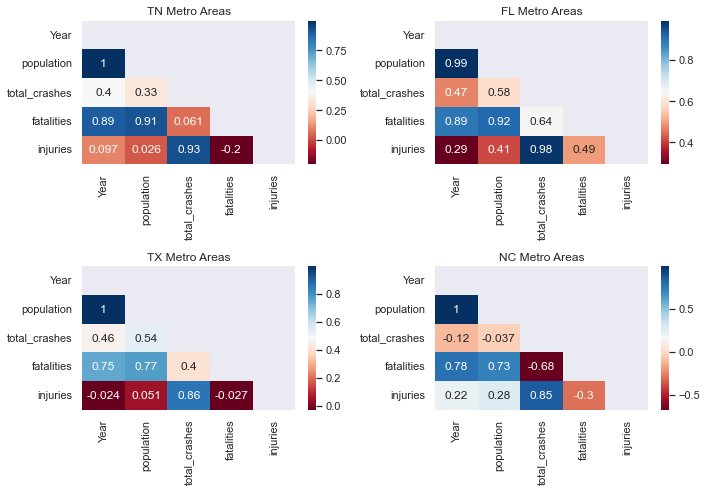

In [353]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,7))
dataplot = sns.heatmap(df_tn_metro.corr(),ax=ax1, cmap="RdBu",annot=True,mask=mask_tn).set(title='TN Metro Areas')
dataplot = sns.heatmap(df_fl_metro.corr(),ax=ax2, cmap="RdBu",annot=True,mask=mask_fl).set(title='FL Metro Areas')
dataplot = sns.heatmap(df_tx_metro.corr(),ax=ax3, cmap="RdBu",annot=True,mask=mask_tx).set(title='TX Metro Areas')
dataplot = sns.heatmap(df_nc_metro.corr(),ax=ax4, cmap="RdBu",annot=True,mask=mask_nc).set(title='NC Metro Areas')
plt.show()

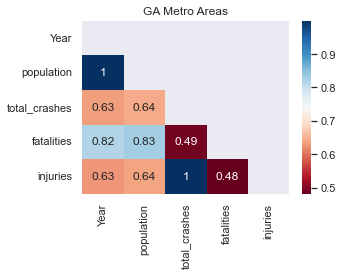

In [354]:
fig,ax = plt.subplots(figsize=(5,4))
dataplot = sns.heatmap(df_ga_metro.corr(),ax=ax, cmap="RdBu",annot=True,mask=mask_ga).set(title='GA Metro Areas')
plt.show()

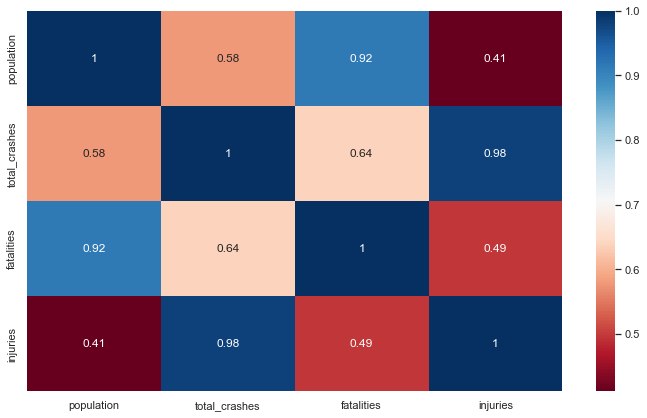

In [236]:
sns.heatmap(df_fl_metro.corr(),annot = True,fmt='.2g',cmap= 'RdBu')
plt.show();

In [229]:
corr = df_fl_metro.corr()
corr.style.background_gradient(cmap='coolwarm')

,population,total_crashes,fatalities,injuries
population,1.000000,0.576939,0.915316,0.411316
total_crashes,0.576939,1.000000,0.638274,0.980119
fatalities,0.915316,0.638274,1.000000,0.494203
injuries,0.411316,0.980119,0.494203,1.000000


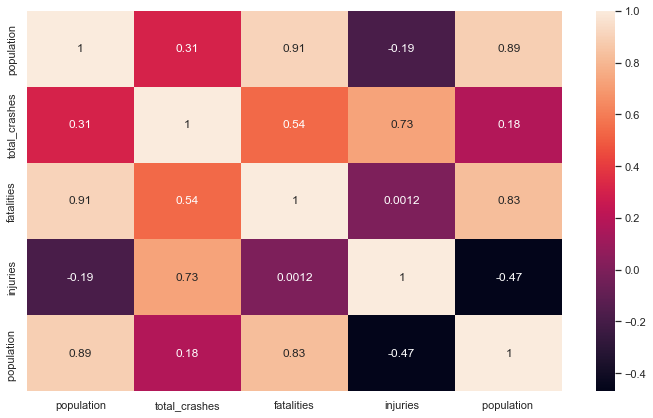

In [194]:
hm = sns.heatmap(df_fl_micro.corr(), annot = True)
plt.show();

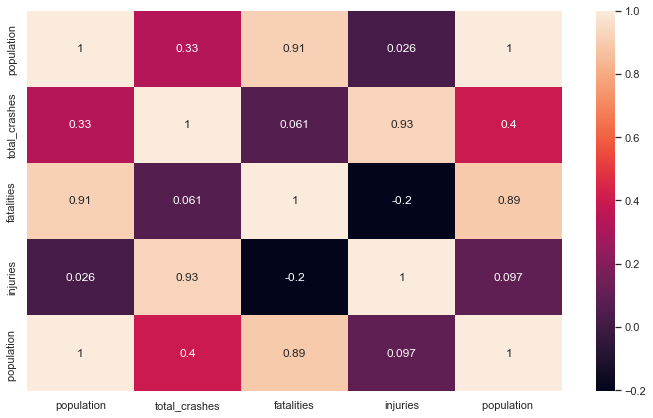

In [195]:
hm = sns.heatmap(df_tn_metro.corr(), annot = True)
plt.show();

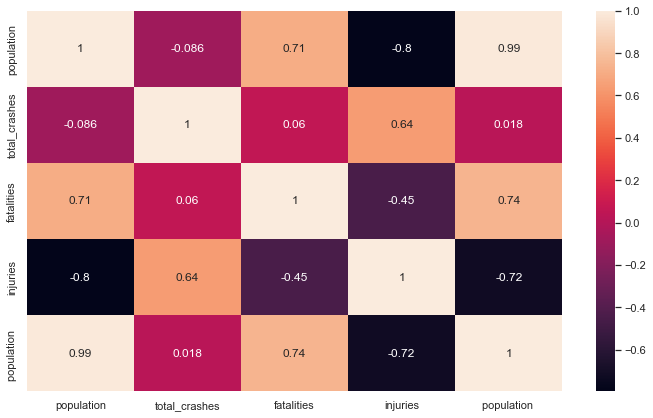

In [201]:
hm = sns.heatmap(df_tn_micro.corr(), annot = True)
plt.show();

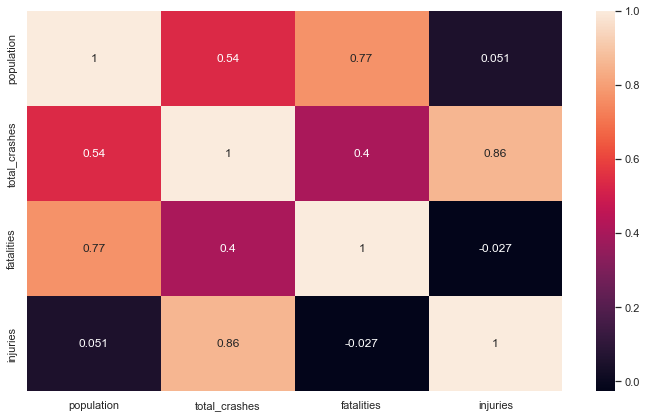

In [223]:
hm = sns.heatmap(df_tx_metro.corr(), annot = True)
plt.show();

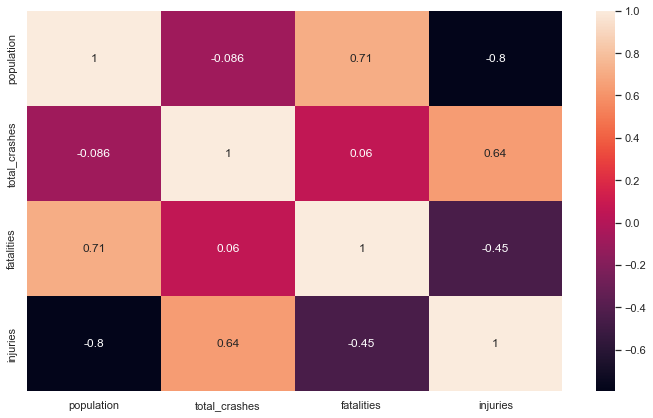

In [224]:
hm = sns.heatmap(df_tn_micro.corr(), annot = True)
plt.show();

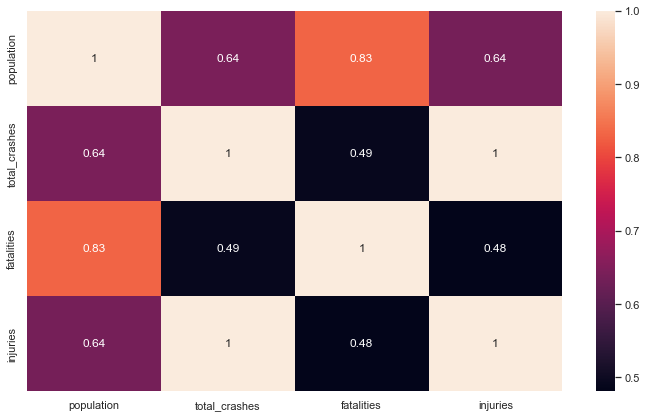

In [225]:
hm = sns.heatmap(df_ga_metro.corr(), annot = True)
plt.show();

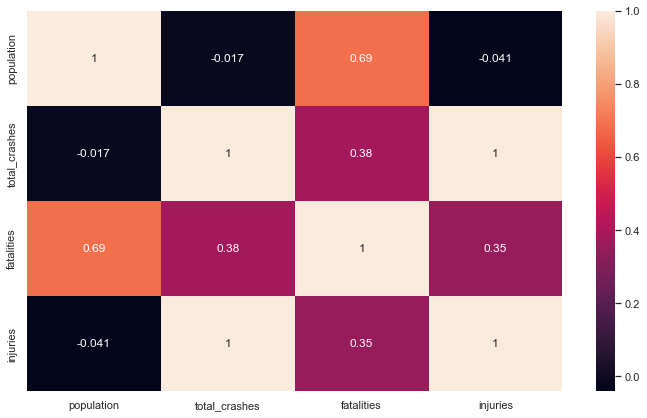

In [226]:
hm = sns.heatmap(df_ga_micro.corr(), annot = True)
plt.show();

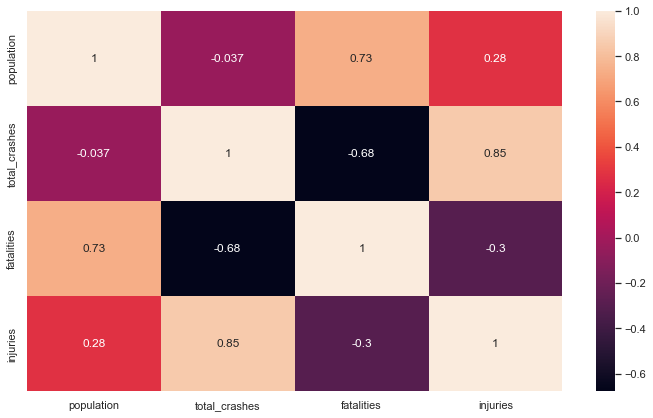

In [227]:
hm = sns.heatmap(df_nc_metro.corr(), annot = True)
plt.show();

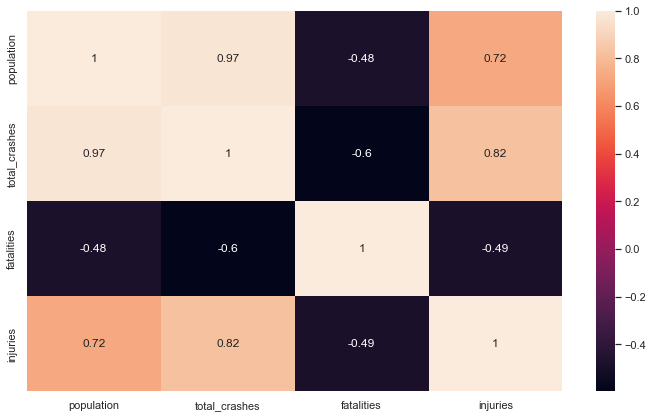

In [228]:
hm = sns.heatmap(df_nc_micro.corr(), annot = True)
plt.show();

In [200]:
# corr = df_tn.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [24]:
# df_master_pop_gr = df_master.groupby(["State","CBSA Title","Year","Metropolitan/Micropolitan Statistical Area"])["population"].sum().reset_index()
# df_master_pop_gr.head()
# df_master_pop_gr = pd.pivot(df_master_pop_gr,index=["State","CBSA Title","Metropolitan/Micropolitan Statistical Area"],columns=["Year"]).reset_index()
# df_master_pop_gr
# df_master_pop_gr.to_excel('../data/population.xlsx', engine='xlsxwriter')
# df_master_pop_analysis = df_master_pop_gr.pct_change(axis='columns')
# df_master_pop_analysis
# df_master_pop_analysis

In [25]:
df_master = pd.DataFrame(pd.read_excel('../data/master_file.xlsx'))

In [26]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5402 non-null   int64  
 1   State                                       5402 non-null   object 
 2   County                                      5402 non-null   object 
 3   fatalities                                  5402 non-null   int64  
 4   injuries                                    5402 non-null   int64  
 5   total_crashes                               5402 non-null   int64  
 6   population                                  5400 non-null   float64
 7   CBSA Title                                  3408 non-null   object 
 8   Metropolitan/Micropolitan Statistical Area  3408 non-null   object 
 9   Fatalities per 100,000 population           5400 non-null   float64
 10  Injuries per

### Analyzing crash data and normalizing it based on population

In [27]:
df_crash_analysis = df_master.groupby(["CBSA Title","Year","Metropolitan/Micropolitan Statistical Area","State"]).agg({"population":"sum","fatalities":"sum","injuries":"sum","total_crashes":"sum"}).reset_index()
df_crash_analysis

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,167473.0,39,1223,3946
1,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,168342.0,35,1126,4169
2,"Abilene, TX",2015,Metropolitan Statistical Area,Texas,169688.0,43,1214,4089
3,"Abilene, TX",2016,Metropolitan Statistical Area,Texas,170017.0,29,1223,3976
4,"Abilene, TX",2017,Metropolitan Statistical Area,Texas,170429.0,34,1296,4295
...,...,...,...,...,...,...,...,...
1635,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446.0,2,46,95
1636,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254.0,0,27,124
1637,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149.0,2,22,127
1638,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179.0,0,51,128


In [28]:
df_crash_analysis['Fatalities per 100,000 population'] = round((df_crash_analysis['fatalities'] / df_crash_analysis['population']) * 100000)
df_crash_analysis['Injuries per 100,000 population'] = round((df_crash_analysis['injuries'] / df_crash_analysis['population']) * 100000)
df_crash_analysis['Total Crashes per 100,000 population'] = round((df_crash_analysis['total_crashes'] /df_crash_analysis['population']) * 100000)
df_crash_analysis

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,167473.0,39,1223,3946,23.0,730.0,2356.0
1,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,168342.0,35,1126,4169,21.0,669.0,2477.0
2,"Abilene, TX",2015,Metropolitan Statistical Area,Texas,169688.0,43,1214,4089,25.0,715.0,2410.0
3,"Abilene, TX",2016,Metropolitan Statistical Area,Texas,170017.0,29,1223,3976,17.0,719.0,2339.0
4,"Abilene, TX",2017,Metropolitan Statistical Area,Texas,170429.0,34,1296,4295,20.0,760.0,2520.0
...,...,...,...,...,...,...,...,...,...,...,...
1635,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446.0,2,46,95,14.0,318.0,658.0
1636,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254.0,0,27,124,0.0,189.0,870.0
1637,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149.0,2,22,127,14.0,155.0,898.0
1638,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179.0,0,51,128,0.0,360.0,903.0


In [29]:
df_crash_analysis.to_excel('../data/crash_analysis.xlsx', engine='xlsxwriter',index=False)

In [35]:
df_crash_analysis_totals = df_master.groupby(["CBSA Title","Year","Metropolitan/Micropolitan Statistical Area","State","population"]).agg({"fatalities":"sum","injuries":"sum","total_crashes":"sum"}).reset_index()
df_crash_analysis_totals

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,13502.0,12,58,268
1,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,20044.0,7,43,181
2,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,133927.0,20,1122,3497
3,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,13505.0,4,50,284
4,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,19850.0,5,42,194
...,...,...,...,...,...,...,...,...
3403,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446.0,2,46,95
3404,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254.0,0,27,124
3405,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149.0,2,22,127
3406,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179.0,0,51,128


In [36]:
df_crash_analysis_totals['Fatalities per 100,000 population'] = round((df_crash_analysis['fatalities'] / df_crash_analysis_totals['population']) * 100000)
df_crash_analysis_totals['Injuries per 100,000 population'] = round((df_crash_analysis['injuries'] / df_crash_analysis_totals['population']) * 100000)
df_crash_analysis_totals['Total Crashes per 100,000 population'] = round((df_crash_analysis['total_crashes'] /df_crash_analysis_totals['population']) * 100000)
df_crash_analysis_totals

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,13502.0,12,58,268,289.0,9058.0,29225.0
1,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,20044.0,7,43,181,175.0,5618.0,20799.0
2,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,133927.0,20,1122,3497,32.0,906.0,3053.0
3,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,13505.0,4,50,284,215.0,9056.0,29441.0
4,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,19850.0,5,42,194,171.0,6529.0,21637.0
...,...,...,...,...,...,...,...,...,...,...,...
3403,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446.0,2,46,95,NaN,NaN,NaN
3404,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254.0,0,27,124,NaN,NaN,NaN
3405,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149.0,2,22,127,NaN,NaN,NaN
3406,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179.0,0,51,128,NaN,NaN,NaN


### Identifying states with the most number of counties that are part of metro area and were affected by population growth the most

In [37]:
df_pop_est = pd.DataFrame(pd.read_excel('../data/raw_data/co-est2020.xlsx'))
df_pop_est = df_pop_est.drop(["SUMLEV","REGION","DIVISION","STATE","CENSUS2010POP","ESTIMATESBASE2010","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016","POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE042020"],axis=1)
df_pop_est = df_pop_est[df_pop_est.COUNTY != 0]
df_pop_est['CTYNAME'] = df_pop_est['CTYNAME'].str.replace("County","").str.strip().str.upper()
df_pop_est.rename(columns = {'CTYNAME':'County'}, inplace = True)
df_pop_est.rename(columns = {'STNAME':'State Name'}, inplace = True)
df_pop_est

,COUNTY,State Name,County,POPESTIMATE2013,POPESTIMATE2020
1,1,Alabama,AUTAUGA,54747,56145
2,3,Alabama,BALDWIN,194978,229287
3,5,Alabama,BARBOUR,26946,24589
4,7,Alabama,BIBB,22510,22136
5,9,Alabama,BLOUNT,57630,57879
...,...,...,...,...,...
3189,37,Wyoming,SWEETWATER,45189,42673
3190,39,Wyoming,TETON,22335,23497
3191,41,Wyoming,UINTA,20969,20215
3192,43,Wyoming,WASHAKIE,8417,7760


In [38]:
metros_df = pd.DataFrame(pd.read_excel('../data/raw_data/metro_areas.xlsx',sheet_name='All_States'))
metros_df['County/County Equivalent'] = metros_df['County/County Equivalent'].str.replace("County","").str.strip().str.upper()
metros_df.rename(columns = {'County/County Equivalent':'County'}, inplace = True)
metros_df

,CBSA Title,Metropolitan/Micropolitan Statistical Area,County,State Name
0,"Aberdeen, SD",Micropolitan Statistical Area,BROWN,South Dakota
1,"Aberdeen, SD",Micropolitan Statistical Area,EDMUNDS,South Dakota
2,"Aberdeen, WA",Micropolitan Statistical Area,GRAYS HARBOR,Washington
3,"Abilene, TX",Metropolitan Statistical Area,CALLAHAN,Texas
4,"Abilene, TX",Metropolitan Statistical Area,JONES,Texas
...,...,...,...,...
1911,"Yuba City, CA",Metropolitan Statistical Area,SUTTER,California
1912,"Yuba City, CA",Metropolitan Statistical Area,YUBA,California
1913,"Yuma, AZ",Metropolitan Statistical Area,YUMA,Arizona
1914,"Zanesville, OH",Micropolitan Statistical Area,MUSKINGUM,Ohio


In [39]:
df = pd.merge(df_pop_est,metros_df,on=(["County",'State Name']), how ="left")
df

,COUNTY,State Name,County,POPESTIMATE2013,POPESTIMATE2020,CBSA Title,Metropolitan/Micropolitan Statistical Area
0,1,Alabama,AUTAUGA,54747,56145,"Montgomery, AL",Metropolitan Statistical Area
1,3,Alabama,BALDWIN,194978,229287,"Daphne-Fairhope-Foley, AL",Metropolitan Statistical Area
2,5,Alabama,BARBOUR,26946,24589,"Eufaula, AL-GA",Micropolitan Statistical Area
3,7,Alabama,BIBB,22510,22136,"Birmingham-Hoover, AL",Metropolitan Statistical Area
4,9,Alabama,BLOUNT,57630,57879,"Birmingham-Hoover, AL",Metropolitan Statistical Area
...,...,...,...,...,...,...,...
3138,37,Wyoming,SWEETWATER,45189,42673,"Rock Springs, WY",Micropolitan Statistical Area
3139,39,Wyoming,TETON,22335,23497,"Jackson, WY-ID",Micropolitan Statistical Area
3140,41,Wyoming,UINTA,20969,20215,"Evanston, WY",Micropolitan Statistical Area
3141,43,Wyoming,WASHAKIE,8417,7760,NaN,NaN


In [40]:
df_new = df.groupby(['County','CBSA Title','Metropolitan/Micropolitan Statistical Area','State Name']).agg({'POPESTIMATE2013':'sum','POPESTIMATE2020':'sum'}).reset_index()
df_new

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020
0,ACADIA PARISH,"Lafayette, LA",Metropolitan Statistical Area,Louisiana,62310,61918
1,ADA,"Boise City, ID",Metropolitan Statistical Area,Idaho,416180,494399
2,ADAIR,"Kirksville, MO",Micropolitan Statistical Area,Missouri,25728,25399
3,ADAMS,"Decatur, IN",Micropolitan Statistical Area,Indiana,34655,35839
4,ADAMS,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,Colorado,469995,519883
...,...,...,...,...,...,...
1836,YORK,"Virginia Beach-Norfolk-Newport News, VA-NC",Metropolitan Statistical Area,Virginia,66046,69199
1837,YORK,"York-Hanover, PA",Metropolitan Statistical Area,Pennsylvania,439041,450448
1838,YUBA,"Yuba City, CA",Metropolitan Statistical Area,California,73082,80160
1839,YUMA,"Yuma, AZ",Metropolitan Statistical Area,Arizona,202447,217824


In [41]:
df_new['TOTALGROWTH'] = round(((df_new['POPESTIMATE2020'] - df_new['POPESTIMATE2013'])/ df_new['POPESTIMATE2013'])*100,1)
df_new

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020,TOTALGROWTH
0,ACADIA PARISH,"Lafayette, LA",Metropolitan Statistical Area,Louisiana,62310,61918,-0.6
1,ADA,"Boise City, ID",Metropolitan Statistical Area,Idaho,416180,494399,18.8
2,ADAIR,"Kirksville, MO",Micropolitan Statistical Area,Missouri,25728,25399,-1.3
3,ADAMS,"Decatur, IN",Micropolitan Statistical Area,Indiana,34655,35839,3.4
4,ADAMS,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,Colorado,469995,519883,10.6
...,...,...,...,...,...,...,...
1836,YORK,"Virginia Beach-Norfolk-Newport News, VA-NC",Metropolitan Statistical Area,Virginia,66046,69199,4.8
1837,YORK,"York-Hanover, PA",Metropolitan Statistical Area,Pennsylvania,439041,450448,2.6
1838,YUBA,"Yuba City, CA",Metropolitan Statistical Area,California,73082,80160,9.7
1839,YUMA,"Yuma, AZ",Metropolitan Statistical Area,Arizona,202447,217824,7.6


In [42]:
df_metro = df_new.loc[df_new["Metropolitan/Micropolitan Statistical Area"] == "Metropolitan Statistical Area"]
df_metro = df_metro.sort_values(by=["TOTALGROWTH"],ascending = False)
df_metro

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020,TOTALGROWTH
762,HUDSPETH,"El Paso, TX",Metropolitan Statistical Area,Texas,3333,4906,47.2
1653,TROUSDALE,"Nashville-Davidson--Murfreesboro--Franklin, TN",Metropolitan Statistical Area,Tennessee,7814,11455,46.6
369,COMAL,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,Texas,118663,164812,38.9
711,HAYS,"Austin-Round Rock-Georgetown, TX",Metropolitan Statistical Area,Texas,175933,241365,37.2
1551,ST. JOHNS,"Jacksonville, FL",Metropolitan Statistical Area,Florida,209579,278715,33.0
...,...,...,...,...,...,...,...
135,BOONE,"Charleston, WV",Metropolitan Statistical Area,West Virginia,24091,21055,-12.6
608,GEARY,"Manhattan, KS",Metropolitan Statistical Area,Kansas,36857,32218,-12.6
451,DEKALB,"St. Joseph, MO-KS",Metropolitan Statistical Area,Missouri,12638,10944,-13.4
278,CHATTAHOOCHEE,"Columbus, GA-AL",Metropolitan Statistical Area,Georgia,12271,10551,-14.0


In [68]:
thirfd_quartile = df_metro["TOTALGROWTH"].quantile(.75)
thirfd_quartile

7.9

In [69]:
df_metro_filtered = df_metro[df_metro["TOTALGROWTH"] > thirfd_quartile]
df_metro_filtered

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020,TOTALGROWTH
762,HUDSPETH,"El Paso, TX",Metropolitan Statistical Area,Texas,3333,4906,47.2
1653,TROUSDALE,"Nashville-Davidson--Murfreesboro--Franklin, TN",Metropolitan Statistical Area,Tennessee,7814,11455,46.6
369,COMAL,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,Texas,118663,164812,38.9
711,HAYS,"Austin-Round Rock-Georgetown, TX",Metropolitan Statistical Area,Texas,175933,241365,37.2
1551,ST. JOHNS,"Jacksonville, FL",Metropolitan Statistical Area,Florida,209579,278715,33.0
860,KAUFMAN,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,Texas,108269,143198,32.3
1795,WILLIAMSON,"Austin-Round Rock-Georgetown, TX",Metropolitan Statistical Area,Texas,470494,617855,31.3
866,KENDALL,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,Texas,37151,48523,30.6
1605,SUMTER,"The Villages, FL",Metropolitan Statistical Area,Florida,106980,139018,29.9
1435,ROCKWALL,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,Texas,84732,109888,29.7


In [72]:
df_final_list = df_metro_filtered.groupby(['State Name'])['County'].count().reset_index()
df_final_list = df_final_list.nlargest(10,['County'])
df_final_list

,State Name,County
33,Texas,42
8,Florida,33
9,Georgia,28
25,North Carolina,20
35,Virginia,16
36,Washington,13
5,Colorado,11
30,South Carolina,11
32,Tennessee,11
10,Idaho,10


C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


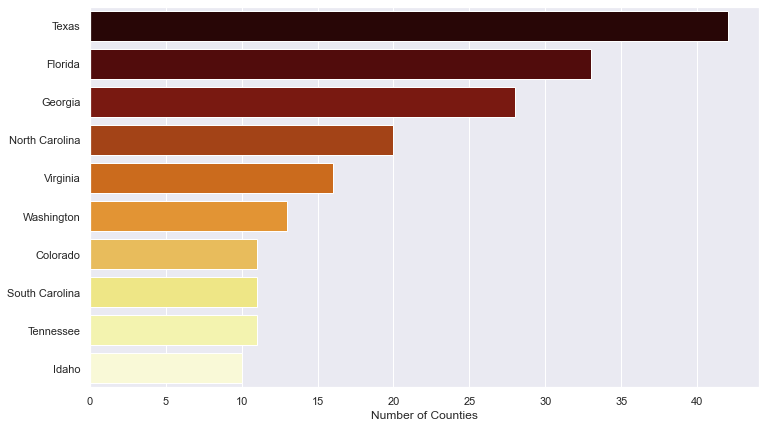

In [86]:
data = df_final_list.sort_values('County',ascending=False)
sns.set(rc={"figure.figsize":(12,7)})
g_df_final_list = sns.barplot('County','State Name', data = data,orient="h", palette = "afmhot",errwidth=0)
g_df_final_list.set_xlabel("Number of Counties")
g_df_final_list.set_ylabel(None)
g_jan_top10.set_title("January",fontdict= { 'fontsize': 18, 'fontweight':'bold'})
plt.savefig("C:/Users/iulia/Documents/NSS/projects/capstone/visuals/top10_states.png");

In [47]:
df_crash_analysis= pd.DataFrame(pd.read_excel('../data/crash_analysis.xlsx'))
df_crash_analysis

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,167473,39,1223,3946,23,730,2356
1,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,168342,35,1126,4169,21,669,2477
2,"Abilene, TX",2015,Metropolitan Statistical Area,Texas,169688,43,1214,4089,25,715,2410
3,"Abilene, TX",2016,Metropolitan Statistical Area,Texas,170017,29,1223,3976,17,719,2339
4,"Abilene, TX",2017,Metropolitan Statistical Area,Texas,170429,34,1296,4295,20,760,2520
...,...,...,...,...,...,...,...,...,...,...,...
1635,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446,2,46,95,14,318,658
1636,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254,0,27,124,0,189,870
1637,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149,2,22,127,14,155,898
1638,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179,0,51,128,0,360,903


In [48]:
df_top5_metro = pd.DataFrame(pd.read_excel('../data/cleaned_data/population.xlsx', sheet_name = "top5_metro" ))
df_top5_micro = pd.DataFrame(pd.read_excel('../data/cleaned_data/population.xlsx', sheet_name = "top5_micro" ))

In [49]:
df_top5_metro

,State,Metropolitan/Micropolitan Statistical Area,CBSA Title,Total Growth
0,FL,Metropolitan Statistical Area,"Cape Coral-Fort Myers, FL",15.889603
1,FL,Metropolitan Statistical Area,"Jacksonville, FL",15.641667
2,FL,Metropolitan Statistical Area,"Lakeland-Winter Haven, FL",17.120840
3,FL,Metropolitan Statistical Area,"Orlando-Kissimmee-Sanford, FL",17.952038
4,FL,Metropolitan Statistical Area,"The Villages, FL",22.450373
5,GA,Metropolitan Statistical Area,"Athens-Clarke County, GA",9.134065
6,GA,Metropolitan Statistical Area,"Atlanta-Sandy Springs-Alpharetta, GA",10.717953
7,GA,Metropolitan Statistical Area,"Gainesville, GA",9.203405
8,GA,Metropolitan Statistical Area,"Savannah, GA",10.942118
9,GA,Metropolitan Statistical Area,"Warner Robins, GA",10.068178


In [50]:
df_top5_micro

,State,Metropolitan/Micropolitan Statistical Area,CBSA Title,Total Growth
0,FL,Micropolitan Statistical Area,"Clewiston, FL",5.019969
1,FL,Micropolitan Statistical Area,"Key West, FL",9.227969
2,FL,Micropolitan Statistical Area,"Lake City, FL",3.666731
3,FL,Micropolitan Statistical Area,"Okeechobee, FL",0.402715
4,FL,Micropolitan Statistical Area,"Palatka, FL",1.350007
5,GA,Micropolitan Statistical Area,"Bainbridge, GA",7.108174
6,GA,Micropolitan Statistical Area,"Cornelia, GA",6.838300
7,GA,Micropolitan Statistical Area,"Jefferson, GA",25.207286
8,GA,Micropolitan Statistical Area,"St. Marys, GA",6.822426
9,GA,Micropolitan Statistical Area,"Statesboro, GA",13.314582


In [51]:
metro = df_top5_metro["CBSA Title"].tolist()
micro = df_top5_micro["CBSA Title"].tolist()

In [52]:
metro

['Cape Coral-Fort Myers, FL',
 'Jacksonville, FL',
 'Lakeland-Winter Haven, FL',
 'Orlando-Kissimmee-Sanford, FL',
 'The Villages, FL',
 'Athens-Clarke County, GA',
 'Atlanta-Sandy Springs-Alpharetta, GA',
 'Gainesville, GA',
 'Savannah, GA',
 'Warner Robins, GA',
 'Burlington, NC',
 'Charlotte-Concord-Gastonia, NC-SC',
 'Durham-Chapel Hill, NC',
 'Myrtle Beach-Conway-North Myrtle Beach, SC-NC',
 'Raleigh-Cary, NC',
 'Chattanooga, TN-GA',
 'Clarksville, TN-KY',
 'Cleveland, TN',
 'Knoxville, TN',
 'Nashville-Davidson--Murfreesboro--Franklin, TN',
 'Austin-Round Rock-Georgetown, TX',
 'College Station-Bryan, TX',
 'Dallas-Fort Worth-Arlington, TX',
 'Houston-The Woodlands-Sugar Land, TX',
 'San Antonio-New Braunfels, TX']

In [53]:
micro

['Clewiston, FL',
 'Key West, FL',
 'Lake City, FL',
 'Okeechobee, FL',
 'Palatka, FL',
 'Bainbridge, GA',
 'Cornelia, GA',
 'Jefferson, GA',
 'St. Marys, GA',
 'Statesboro, GA',
 'Boone, NC',
 'Cullowhee, NC',
 'Kill Devil Hills, NC',
 'Pinehurst-Southern Pines, NC',
 'Sanford, NC',
 'Cookeville, TN',
 'Crossville, TN',
 'Lewisburg, TN',
 'Shelbyville, TN',
 'Tullahoma-Manchester, TN',
 'Andrews, TX',
 'Corsicana, TX',
 'Gainesville, TX',
 'Granbury, TX',
 'Huntsville, TX']

In [54]:
df_crash_analysis_top5_metro = df_crash_analysis[df_crash_analysis["CBSA Title"].isin(metro)]
df_crash_analysis_top5_micro = df_crash_analysis[df_crash_analysis["CBSA Title"].isin(micro)]

In [55]:
df_crash_analysis_top5_metro

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
88,"Athens-Clarke County, GA",2013,Metropolitan Statistical Area,Georgia,197590,24,2518,2542,12,1274,1287
89,"Athens-Clarke County, GA",2014,Metropolitan Statistical Area,Georgia,198361,23,2442,2465,12,1231,1243
90,"Athens-Clarke County, GA",2015,Metropolitan Statistical Area,Georgia,202565,28,2793,2821,14,1379,1393
91,"Athens-Clarke County, GA",2016,Metropolitan Statistical Area,Georgia,205402,28,2825,2853,14,1375,1389
92,"Athens-Clarke County, GA",2017,Metropolitan Statistical Area,Georgia,209106,17,2854,2871,8,1365,1373
93,"Athens-Clarke County, GA",2018,Metropolitan Statistical Area,Georgia,211468,26,2351,2377,12,1112,1124
94,"Athens-Clarke County, GA",2019,Metropolitan Statistical Area,Georgia,213750,23,2750,2773,11,1287,1297
95,"Athens-Clarke County, GA",2020,Metropolitan Statistical Area,Georgia,215638,30,2380,2410,14,1104,1118
96,"Atlanta-Sandy Springs-Alpharetta, GA",2013,Metropolitan Statistical Area,Georgia,5510530,527,70868,71395,10,1286,1296
97,"Atlanta-Sandy Springs-Alpharetta, GA",2014,Metropolitan Statistical Area,Georgia,5593204,479,71516,71995,9,1279,1287


In [56]:
df_crash_analysis_top5_micro

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
48,"Andrews, TX",2013,Micropolitan Statistical Area,Texas,16779,12,80,294,72,477,1752
49,"Andrews, TX",2014,Micropolitan Statistical Area,Texas,17435,11,87,366,63,499,2099
50,"Andrews, TX",2015,Micropolitan Statistical Area,Texas,18072,14,31,225,77,172,1245
51,"Andrews, TX",2016,Micropolitan Statistical Area,Texas,17791,1,44,218,6,247,1225
52,"Andrews, TX",2017,Micropolitan Statistical Area,Texas,17603,16,61,218,91,347,1238
53,"Andrews, TX",2018,Micropolitan Statistical Area,Texas,18011,9,112,380,50,622,2110
54,"Andrews, TX",2019,Micropolitan Statistical Area,Texas,18705,15,118,387,80,631,2069
55,"Andrews, TX",2020,Micropolitan Statistical Area,Texas,18612,4,84,329,21,451,1768
120,"Bainbridge, GA",2013,Micropolitan Statistical Area,Georgia,27391,10,232,242,37,847,884
121,"Bainbridge, GA",2014,Micropolitan Statistical Area,Georgia,27167,10,320,330,37,1178,1215


In [57]:
frames = [df_crash_analysis_top5_metro,df_crash_analysis_top5_micro]
df_crash_analysis_top5 = pd.concat(frames)
df_crash_analysis_top5

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
88,"Athens-Clarke County, GA",2013,Metropolitan Statistical Area,Georgia,197590,24,2518,2542,12,1274,1287
89,"Athens-Clarke County, GA",2014,Metropolitan Statistical Area,Georgia,198361,23,2442,2465,12,1231,1243
90,"Athens-Clarke County, GA",2015,Metropolitan Statistical Area,Georgia,202565,28,2793,2821,14,1379,1393
91,"Athens-Clarke County, GA",2016,Metropolitan Statistical Area,Georgia,205402,28,2825,2853,14,1375,1389
92,"Athens-Clarke County, GA",2017,Metropolitan Statistical Area,Georgia,209106,17,2854,2871,8,1365,1373
93,"Athens-Clarke County, GA",2018,Metropolitan Statistical Area,Georgia,211468,26,2351,2377,12,1112,1124
94,"Athens-Clarke County, GA",2019,Metropolitan Statistical Area,Georgia,213750,23,2750,2773,11,1287,1297
95,"Athens-Clarke County, GA",2020,Metropolitan Statistical Area,Georgia,215638,30,2380,2410,14,1104,1118
96,"Atlanta-Sandy Springs-Alpharetta, GA",2013,Metropolitan Statistical Area,Georgia,5510530,527,70868,71395,10,1286,1296
97,"Atlanta-Sandy Springs-Alpharetta, GA",2014,Metropolitan Statistical Area,Georgia,5593204,479,71516,71995,9,1279,1287


In [58]:
df_crash_analysis_top5.to_excel('../data/crash_analysis_top5.xlsx',index=False,engine='xlsxwriter')